In [1]:
import mod1
import importlib
importlib.reload(mod1)

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t
from scipy.stats import norm

In [2]:
list_name_tickers = [
    'MSFT',
    'AAPL',
    'FB',
    'AMZN',
    'NDAQ',
    'SPY'
]
list_name_tickers_pf = [
    'MSFT',
    'AAPL',
    'FB'
]
nb_days = 252
period = '252d'
df_stocks_prices = mod1.create_df_prices(list_name_tickers, period=period, cat='Open')

In [3]:
df_returns = df_stocks_prices.pct_change()[1:]
df_pf = df_stocks_prices[list_name_tickers_pf]
df_pf_returns = df_pf.pct_change()[1:]
mean_returns = np.array(df_returns.mean())
cov_returns = np.array(df_returns.cov())
rf_rate = 0.0178
market_returns = df_returns['SPY']

weights = [0.333, 0.333, 0.333]
daily_returns = mod1.pf_daily_returns(weights, df_pf_returns, nb_days)

VaR normal : 0.0367
VaR t      : 0.0347


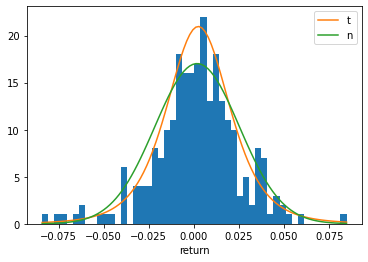

In [4]:
def compute_var(returns_sorted, alpha, type_dist='normal'):
    data = returns_sorted
    if type_dist == 'normal':
        mu, std = norm.fit(data)
        return norm.ppf(alpha) * std + mu
    elif type_dist == 't':
        df, loc, scale = t.fit(data)
        return t.ppf(alpha, df) * scale + loc
    else:
        raise Exception('not possible to fit distribution ' + type_dist) 
    

def plot_returns(returns):
    data = sorted(returns)
    params_t = t.fit(data)
    params_n = norm.fit(data)
    x = np.linspace(data[0], data[-1], 100)
    plt.figure(1)
    plt.hist(data, bins=50)
    plt.plot(x, t.pdf(x, params_t[0], params_t[1], params_t[2]), label='t')
    plt.plot(x, norm.pdf(x, params_n[0], params_n[1]), label='n')
    plt.legend()
    plt.xlabel('return')
    plt.show()

print('VaR normal : {:.4f}'.format(-compute_var(sorted(df_pf_returns['MSFT']), 0.05)))
print('VaR t      : {:.4f}'.format(-compute_var(sorted(df_pf_returns['MSFT']), 0.05, 't')))
plot_returns(df_pf_returns['MSFT'])